In [1]:
import os
import pandas as pd
import numpy as np

Dados após simulação


In [2]:
FINAL_EXPORT_FILES_PATH = "N://TESE//Bullwhip//data//exports//"

In [3]:

files = os.listdir(FINAL_EXPORT_FILES_PATH)
for f in files:
    print(f)
    

closed_transactions.csv
db_log.csv
db_stats_log.csv
delivered_transactions.csv
final_closed_transactions.csv
final_open_transactions.csv
history
inventory_0.csv
inventory_1.csv
inventory_2.csv
inventory_3.csv
inventory_4.csv
inventory_5.csv
inventory_log.csv
inventory_snapshot.csv
inventory_snapshot_cleaned.csv
open_transactions.csv
orders_1.csv
orders_2.csv
orders_3.csv
orders_4.csv
orders_5.csv
scheduled_stock.csv
simulation_stats.csv
t_bkup.csv


In [4]:
closed_transactions         = pd.read_csv(FINAL_EXPORT_FILES_PATH+"closed_transactions.csv")
db_log                      = pd.read_csv(FINAL_EXPORT_FILES_PATH+"db_log.csv")
db_stats_log                = pd.read_csv(FINAL_EXPORT_FILES_PATH+"db_stats_log.csv")
delivered_transactions      = pd.read_csv(FINAL_EXPORT_FILES_PATH+"delivered_transactions.csv")
final_closed_transactions   = pd.read_csv(FINAL_EXPORT_FILES_PATH+"final_closed_transactions.csv")
final_open_transactions     = pd.read_csv(FINAL_EXPORT_FILES_PATH+"final_open_transactions.csv")
inventory_0                 = pd.read_csv(FINAL_EXPORT_FILES_PATH+"inventory_0.csv")
inventory_1                 = pd.read_csv(FINAL_EXPORT_FILES_PATH+"inventory_1.csv")
inventory_2                 = pd.read_csv(FINAL_EXPORT_FILES_PATH+"inventory_2.csv")
inventory_3                 = pd.read_csv(FINAL_EXPORT_FILES_PATH+"inventory_3.csv")
inventory_4                 = pd.read_csv(FINAL_EXPORT_FILES_PATH+"inventory_4.csv")
inventory_5                 = pd.read_csv(FINAL_EXPORT_FILES_PATH+"inventory_5.csv")
inventory_log               = pd.read_csv(FINAL_EXPORT_FILES_PATH+"inventory_log.csv")
# inventory_snapshot          = pd.read_csv(FINAL_EXPORT_FILES_PATH+"inventory_snapshot.csv", index_col="_id")
open_transactions           = pd.read_csv(FINAL_EXPORT_FILES_PATH+"open_transactions.csv")
orders_1                    = pd.read_csv(FINAL_EXPORT_FILES_PATH+"orders_1.csv")
orders_2                    = pd.read_csv(FINAL_EXPORT_FILES_PATH+"orders_2.csv")
orders_3                    = pd.read_csv(FINAL_EXPORT_FILES_PATH+"orders_3.csv")
orders_4                    = pd.read_csv(FINAL_EXPORT_FILES_PATH+"orders_4.csv")
orders_5                    = pd.read_csv(FINAL_EXPORT_FILES_PATH+"orders_5.csv")
scheduled_stock             = pd.read_csv(FINAL_EXPORT_FILES_PATH+"scheduled_stock.csv")
simulation_stats            = pd.read_csv(FINAL_EXPORT_FILES_PATH+"simulation_stats.csv")
t_bkup                      = pd.read_csv(FINAL_EXPORT_FILES_PATH+"t_bkup.csv")

In [5]:
closed_transactions.groupby(by=["receiver"]).sum()
open_transactions.groupby(by=["receiver"]).sum()

,_id,deliver_day,order_id,order_criation_day,sending_day,sender,product,quantity,transit_time,lead_time,theoretical_lead,transaction_id
receiver,,,,,,,,,,,,
0,1,11,1000001,1,1,1,1001,10833,0.0,0.0,10,1
1,2,12,2000001,2,2,2,2001,10833,0.0,0.0,10,2
2,3,12,3000001,2,2,3,3001,10833,0.0,0.0,10,3
3,4,12,4000001,2,2,4,4001,10833,0.0,0.0,10,4
4,1066520,282390,7280530712,267176,267176,7280,7281456,52392282,0.0,0.0,15214,1066520


In [6]:
import csv
import json
with open(FINAL_EXPORT_FILES_PATH+"inventory_snapshot.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
     
    cols = ["day", 'id', 'in_stock']
    lst = []
    for row in reader:
        x = row["inventory"].replace("'", '"')
        x= json.loads(x)
        
        for k, v in x.items():
            id = dict(list(v.values())[0])["id"]
            in_stock = dict(list(v.values())[0])["in_stock"]
            lst.append([int(row["_id"]),id, in_stock])
            
    inventory_snapshot = pd.DataFrame(lst, columns=cols)


In [7]:
# a=inventory_snapshot[id<5001].groupby(by=["day", "id"]).sum()
# b=inventory_snapshot.groupby(by=[""])
# inventory_snapshot[inventory_snapshot.id <5000]


inventory_snapshot.to_csv(FINAL_EXPORT_FILES_PATH+"inventory_snapshot_cleaned.csv", sep=";")

In [8]:
final_open_transactions

,_id,deliver_day,order_id,order_criation_day,sending_day,receiver,sender,product,quantity,transit_time,lead_time,theoretical_lead,transaction_id
0,43,14,5000020,11,11,4,5,5001,49204,NaN,NaN,3,43
1,44,18,5000020,11,11,4,5,5001,49204,NaN,NaN,7,44
2,45,18,5000021,12,12,4,5,5001,12301,NaN,NaN,6,45
3,46,25,5000021,12,12,4,5,5001,12301,NaN,NaN,13,46
4,47,22,5000022,12,12,4,5,5001,49204,NaN,NaN,10,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1456,373,5000726,364,364,4,5,5001,53316,NaN,NaN,9,1456
1414,1457,375,5000727,365,365,4,5,5001,13329,NaN,NaN,10,1457
1415,1458,373,5000727,365,365,4,5,5001,13329,NaN,NaN,8,1458
1416,1459,371,5000728,365,365,4,5,5001,53316,NaN,NaN,6,1459


In [9]:
final_closed_transactions

,_id,deliver_day,order_id,order_criation_day,sending_day,receiver,sender,product,quantity,transit_time,lead_time,theoretical_lead,transaction_id,delivered,update_day
0,1,11,1000001,1,1,0,1,1001,10833,NaN,10,10,1,1,11
1,2,12,2000001,2,2,1,2,2001,10833,NaN,10,10,2,1,12
2,3,12,3000001,2,2,2,3,3001,10833,NaN,10,10,3,1,12
3,4,12,4000001,2,2,3,4,4001,10833,NaN,10,10,4,1,12
4,20,12,5000008,5,5,4,5,5001,43332,NaN,7,7,20,1,12
5,21,12,5000009,6,6,4,5,5001,10833,NaN,7,6,21,1,13
6,10,14,5000003,3,3,4,5,5001,10833,NaN,11,11,10,1,14
7,7,15,5000002,2,2,4,5,5001,10833,NaN,13,13,7,1,15
8,5,16,5000001,2,2,4,5,5001,10833,NaN,14,14,5,1,16
9,6,16,5000001,2,2,4,5,5001,10833,NaN,15,14,6,1,17


In [13]:
inventory_snapshot

,day,id,in_stock
0,1,1001,13648
1,1,2001,13648
2,1,3001,13648
3,1,4001,13648
4,1,5001,9999999999
...,...,...,...
2185,365,3001,10833
2186,365,4001,10833
2187,365,5001,949254
2188,365,5001,9947741007


In [27]:
history_inventory_1 = inventory_snapshot[inventory_snapshot["id"]==1001]
history_inventory_2 = inventory_snapshot[inventory_snapshot["id"]==2001]
history_inventory_3 = inventory_snapshot[inventory_snapshot["id"]==3001]
history_inventory_4 = inventory_snapshot[inventory_snapshot["id"]==4001]

<AxesSubplot:xlabel='day'>

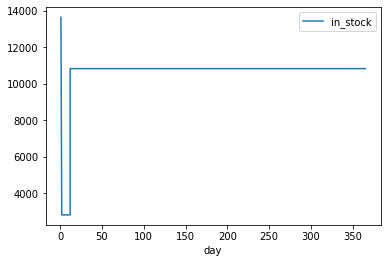

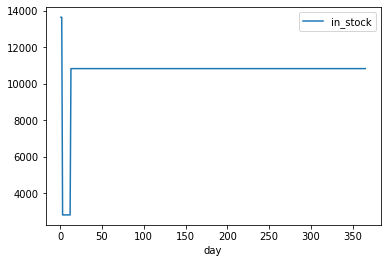

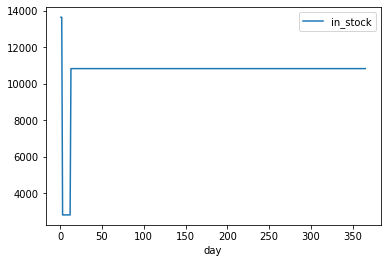

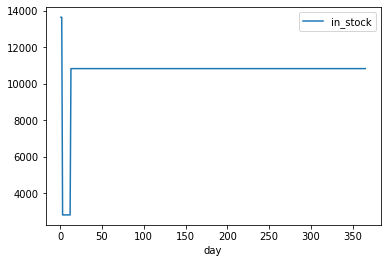

In [40]:


history_inventory_1.plot(x="day", y="in_stock")
history_inventory_2.plot(x="day", y="in_stock")
history_inventory_3.plot(x="day", y="in_stock")
history_inventory_4.plot(x="day", y="in_stock")

In [41]:
final_open_transactions.groupby

,_id,deliver_day,order_id,order_criation_day,sending_day,receiver,sender,product,quantity,transit_time,lead_time,theoretical_lead,transaction_id
0,43,14,5000020,11,11,4,5,5001,49204,NaN,NaN,3,43
1,44,18,5000020,11,11,4,5,5001,49204,NaN,NaN,7,44
2,45,18,5000021,12,12,4,5,5001,12301,NaN,NaN,6,45
3,46,25,5000021,12,12,4,5,5001,12301,NaN,NaN,13,46
4,47,22,5000022,12,12,4,5,5001,49204,NaN,NaN,10,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1456,373,5000726,364,364,4,5,5001,53316,NaN,NaN,9,1456
1414,1457,375,5000727,365,365,4,5,5001,13329,NaN,NaN,10,1457
1415,1458,373,5000727,365,365,4,5,5001,13329,NaN,NaN,8,1458
1416,1459,371,5000728,365,365,4,5,5001,53316,NaN,NaN,6,1459
